In [1]:
import pandas as pd
import requests
import re
import numpy as np
import urllib.parse

In [2]:
url = 'https://zelda.fanapis.com/api/characters?limit=100&page=33'
r = requests.get(url)

In [89]:
r.json()

{'success': True,
 'count': 27,
 'data': [{'appearances': ['https://zelda.fanapis.com/api/games/5f6ce9d805615a85623ec2c8'],
   'name': 'Gaepora',
   'description': 'Gaepora is a character in Skyward Sword. He is the father of Zelda, the headmaster of the Knight Academy, and the owner of Mia. He is knowledgeable of the history and legends of Skyloft, and proves to be of invaluable help to Link during his quest to save Zelda. ',
   'gender': 'Male',
   'race': 'Hylian',
   'id': '5f6d186f246bd9a0809d6505'},
  {'appearances': ['https://zelda.fanapis.com/api/games/5f6ce9d805615a85623ec2c3'],
   'name': 'Sale',
   'description': "Sale is a character in Link's Awakening. ",
   'gender': 'Male',
   'race': None,
   'id': '5f6d186f246bd9a0809d651e'},
  {'appearances': ['https://zelda.fanapis.com/api/games/5f6ce9d805615a85623ec2c9'],
   'name': 'Mija',
   'description': 'Mija is a character in Breath of the Wild. ',
   'gender': 'Female',
   'race': 'Great Fairy',
   'id': '5f6d186f246bd9a0809d

In [3]:
data = r.json()['data']
print(data)

[{'appearances': ['https://zelda.fanapis.com/api/games/5f6ce9d805615a85623ec2c8'], 'name': 'Gaepora', 'description': 'Gaepora is a character in Skyward Sword. He is the father of Zelda, the headmaster of the Knight Academy, and the owner of Mia. He is knowledgeable of the history and legends of Skyloft, and proves to be of invaluable help to Link during his quest to save Zelda. ', 'gender': 'Male', 'race': 'Hylian', 'id': '5f6d186f246bd9a0809d6505'}, {'appearances': ['https://zelda.fanapis.com/api/games/5f6ce9d805615a85623ec2c3'], 'name': 'Sale', 'description': "Sale is a character in Link's Awakening. ", 'gender': 'Male', 'race': None, 'id': '5f6d186f246bd9a0809d651e'}, {'appearances': ['https://zelda.fanapis.com/api/games/5f6ce9d805615a85623ec2c9'], 'name': 'Mija', 'description': 'Mija is a character in Breath of the Wild. ', 'gender': 'Female', 'race': 'Great Fairy', 'id': '5f6d186f246bd9a0809d6537'}, {'appearances': ['https://zelda.fanapis.com/api/games/5f6ce9d805615a85623ec2c9'], 

In [91]:
df = pd.DataFrame(data)
print(df)

                                          appearances  \
0   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
1   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
2   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
3   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
4   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
5   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
6   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
7   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
8   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
9   [https://zelda.fanapis.com/api/games/5f6ce9d80...   
10                                                 []   
11  [https://zelda.fanapis.com/api/games/5f6ce9d80...   
12  [https://zelda.fanapis.com/api/games/5f6ce9d80...   
13  [https://zelda.fanapis.com/api/games/5f6ce9d80...   
14  [https://zelda.fanapis.com/api/games/5f6ce9d80...   
15  [https://zelda.fanapis.com/api/games/5f6ce9d80...   
16  [https://zelda.fanapis.com/

In [94]:
df.shape
df.columns
#df.race

Index(['appearances', 'name', 'description', 'gender', 'race', 'id'], dtype='object')

In [4]:
url = 'https://zelda.fanapis.com/api/characters?limit=100&page='
newurl = ""
#df = []
all_data = []

for i in range(0,34) :
    newurl = url + str(i)
    r = requests.get(newurl)
    data = r.json()['data']
    all_data.extend(data)

In [5]:
df = pd.DataFrame(all_data)

In [129]:
print(df)

                                            appearances  \
0     [https://zelda.fanapis.com/api/games/5f6ce9d80...   
1     [https://zelda.fanapis.com/api/games/5f6ce9d80...   
2     [https://zelda.fanapis.com/api/games/5f6ce9d80...   
3     [https://zelda.fanapis.com/api/games/5f6ce9d80...   
4     [https://zelda.fanapis.com/api/games/5f6ce9d80...   
...                                                 ...   
1672  [https://zelda.fanapis.com/api/games/5f6ce9d80...   
1673  [https://zelda.fanapis.com/api/games/5f6ce9d80...   
1674  [https://zelda.fanapis.com/api/games/5f6ce9d80...   
1675                                                 []   
1676  [https://zelda.fanapis.com/api/games/5f6ce9d80...   

                                   name  \
0                                Anjean   
1                      Animal Companion   
2                          Ancient Oven   
3                           Angler Fish   
4                                Carben   
...                              

In [6]:
df.shape
type(df.appearances[0])
#len('5f6ce9d805615a85623ec2c6')

#df.appearances.str.extract(r'([^/]+)$')
#df['appearances'].apply(lambda x: x.split('/')[-1])
df['str'] = df['appearances'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['str'].str.extract(r'([^/]+)$')
#type(df.str[0])

,0
0,5f6ce9d805615a85623ec2c5
1,5f6ce9d805615a85623ec2c0
2,5f6ce9d805615a85623ec2c9
3,5f6ce9d805615a85623ec2c3
4,5f6ce9d805615a85623ec2c5
...,...
1672,5f6ce9d805615a85623ec2bc
1673,5f6ce9d805615a85623ec2b8
1674,5f6ce9d805615a85623ec2c9
1675,NaN


In [36]:
df['string'] = df['appearances'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
id = df['string'].str.extract(r'([^/]+)$')

df['game_id'] = id
type(id[0])
#df['game_id']
#df.game_id

pandas.core.series.Series

In [34]:
#df['game_id'] = df['appearances'][-24:]
str(df['appearances'][0])[-26:-2]
for i in range(len(df)) :
    df['game_id'][i] = str(df['appearances'][i][-26:-2])

C:\Users\graci\AppData\Local\Temp\ipykernel_5920\3228574957.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['game_id'][i] = str(df['appearances'][i][-26:-2])
C:\Users\graci\AppData\Local\Temp\ipykernel_5920\3228574957.py:4: FutureWarn

In [37]:
df['game_id']
#df.game_id

0       5f6ce9d805615a85623ec2c5
1       5f6ce9d805615a85623ec2c0
2       5f6ce9d805615a85623ec2c9
3       5f6ce9d805615a85623ec2c3
4       5f6ce9d805615a85623ec2c5
                  ...           
1672    5f6ce9d805615a85623ec2bc
1673    5f6ce9d805615a85623ec2b8
1674    5f6ce9d805615a85623ec2c9
1675                         NaN
1676    5f6ce9d805615a85623ec2c9
Name: game_id, Length: 1677, dtype: object

In [172]:
#df['game_id'] = df.appearances[-24:]
#df['str'] = df['appearances'].astype('str')
#df['str'] = df['appearances'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
#df['game_id'] = df['str'].str.extract(r'([^/]+)$')

#df['str'] = df['appearances'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
#df['game_id'] = df['str'].str.extract(r'([^/]+)$')
df.game_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1672   NaN
1673   NaN
1674   NaN
1675   NaN
1676   NaN
Name: appearances, Length: 1677, dtype: float64

In [9]:
urlg = 'https://zelda.fanapis.com/api/games?limit=100'

In [10]:
gr = requests.get(urlg)
gr.json()

{'success': True,
 'count': 32,
 'data': [{'name': 'The Legend of Zelda',
   'description': 'The Legend of Zelda is the first installment of the Zelda series. It centers its plot around a boy named Link, who becomes the central protagonist throughout the series. It came out as early as 1986 for the Famicom in Japan, and was later released in the western world, including Europe and the US in 1987. It has since then been re-released several times, for the Nintendo GameCube as well as the Game Boy Advance. The Japanese version of the game on the Famicom is known as The Hyrule Fantasy: The Legend of Zelda. ',
   'developer': 'Nintendo R&D 4',
   'publisher': 'Nintendo',
   'released_date': ' February 21, 1986',
   'id': '5f6ce9d805615a85623ec2b7'},
  {'name': 'The Legend of Zelda: A Link to the Past',
   'description': 'One day, a band of evil thieves managed to open the gateway to the Sacred Realm, where the mystical Triforce was hidden. Upon finding the sacred golden relic, the leader of

In [11]:
gdata = gr.json()['data']

In [12]:
games = pd.DataFrame(gdata)
print(games)

                                                 name  \
0                                 The Legend of Zelda   
1             The Legend of Zelda: A Link to the Past   
2                The Legend of Zelda: Ocarina of Time   
3                 The Legend of Zelda: Oracle of Ages   
4            The Legend of Zelda: Link's Awakening DX   
5                  The Legend of Zelda: Majora's Mask   
6                     Zelda II: The Adventure of Link   
7                 The Legend of Zelda: The Wind Waker   
8              The Legend of Zelda: Twilight Princess   
9              The Legend of Zelda: Oracle of Seasons   
10                 The Legend of Zelda: Spirit Tracks   
11      BS The Legend of Zelda: Ancient Stone Tablets   
12                                    Hyrule Warriors   
13        The Legend of Zelda: Four Swords Adventures   
14              The Legend of Zelda: Tri Force Heroes   
15            The Legend of Zelda: Breath of the Wild   
16              The Legend of Z

In [16]:
games

,name,id
0,The Legend of Zelda,5f6ce9d805615a85623ec2b7
1,The Legend of Zelda: A Link to the Past,5f6ce9d805615a85623ec2b8
2,The Legend of Zelda: Ocarina of Time,5f6ce9d805615a85623ec2ba
3,The Legend of Zelda: Oracle of Ages,5f6ce9d805615a85623ec2b9
4,The Legend of Zelda: Link's Awakening DX,5f6ce9d805615a85623ec2bb
5,The Legend of Zelda: Majora's Mask,5f6ce9d805615a85623ec2bc
6,Zelda II: The Adventure of Link,5f6ce9d805615a85623ec2bd
7,The Legend of Zelda: The Wind Waker,5f6ce9d805615a85623ec2bf
8,The Legend of Zelda: Twilight Princess,5f6ce9d805615a85623ec2be
9,The Legend of Zelda: Oracle of Seasons,5f6ce9d805615a85623ec2c0


In [ ]:
del games['description']
del games['developer']
del games['publisher']
del games['released_date']
#games.drop(columns=['description','developer','publisher','released_date'],inplace=True)

In [47]:
games.rename(columns={'id':'game_id','name':'title'},inplace=True)

In [40]:
df['game_id'][566]

'5f6ce9d805615a85623ec2c3'

In [44]:
games['game_id']

0     5f6ce9d805615a85623ec2b7
1     5f6ce9d805615a85623ec2b8
2     5f6ce9d805615a85623ec2ba
3     5f6ce9d805615a85623ec2b9
4     5f6ce9d805615a85623ec2bb
5     5f6ce9d805615a85623ec2bc
6     5f6ce9d805615a85623ec2bd
7     5f6ce9d805615a85623ec2bf
8     5f6ce9d805615a85623ec2be
9     5f6ce9d805615a85623ec2c0
10    5f6ce9d805615a85623ec2c5
11    5f6ce9d805615a85623ec2ca
12    5f6ce9d805615a85623ec2cf
13    5f6ce9d805615a85623ec2c1
14    5f6ce9d805615a85623ec2d4
15    5f6ce9d805615a85623ec2c9
16    5f6ce9d805615a85623ec2ce
17    5f6ce9d805615a85623ec2d3
18    5f6ce9d805615a85623ec2c4
19    5f6ce9d805615a85623ec2c6
20    5f6ce9d805615a85623ec2cb
21    5f6ce9d805615a85623ec2d0
22    5f6ce9d805615a85623ec2d5
23    5f6ce9d805615a85623ec2c2
24    5f6ce9d805615a85623ec2c3
25    5f6ce9d805615a85623ec2c7
26    5f6ce9d805615a85623ec2c8
27    5f6ce9d805615a85623ec2cd
28    5f6ce9d805615a85623ec2cc
29    5f6ce9d805615a85623ec2d1
30    5f6ce9d805615a85623ec2d2
31    5f6ce9d805615a85623ec2d6
Name: ga

In [48]:
newdf = pd.merge(df,games, on='game_id',how='left')

In [49]:
newdf

,appearances,name,description,gender,race,id,str,string,game_id,title
0,[https://zelda.fanapis.com/api/games/5f6ce9d80...,Anjean,Anjean is a character in Spirit Tracks. She i...,Female,Lokomo,5f6d186f246bd9a0809d6115,https://zelda.fanapis.com/api/games/5f6ce9d805...,https://zelda.fanapis.com/api/games/5f6ce9d805...,5f6ce9d805615a85623ec2c5,The Legend of Zelda: Spirit Tracks
1,[https://zelda.fanapis.com/api/games/5f6ce9d80...,Animal Companion,The Animal Companions are three characters in ...,None,None,5f6d186f246bd9a0809d6116,https://zelda.fanapis.com/api/games/5f6ce9d805...,https://zelda.fanapis.com/api/games/5f6ce9d805...,5f6ce9d805615a85623ec2c0,The Legend of Zelda: Oracle of Seasons
2,[https://zelda.fanapis.com/api/games/5f6ce9d80...,Ancient Oven,The Ancient Oven is a character in Breath of t...,None,None,5f6d186f246bd9a0809d6117,https://zelda.fanapis.com/api/games/5f6ce9d805...,https://zelda.fanapis.com/api/games/5f6ce9d805...,5f6ce9d805615a85623ec2c9,The Legend of Zelda: Breath of the Wild
3,[https://zelda.fanapis.com/api/games/5f6ce9d80...,Angler Fish,The Angler Fish is a recurring Boss in The Leg...,None,None,5f6d186f246bd9a0809d6118,https://zelda.fanapis.com/api/games/5f6ce9d805...,https://zelda.fanapis.com/api/games/5f6ce9d805...,5f6ce9d805615a85623ec2c3,The Legend of Zelda: Link's Awakening
4,[https://zelda.fanapis.com/api/games/5f6ce9d80...,Carben,Carben is a character from Spirit Tracks. He i...,Male,Lokomo,5f6d186f246bd9a0809d611a,https://zelda.fanapis.com/api/games/5f6ce9d805...,https://zelda.fanapis.com/api/games/5f6ce9d805...,5f6ce9d805615a85623ec2c5,The Legend of Zelda: Spirit Tracks
...,...,...,...,...,...,...,...,...,...,...
1672,[https://zelda.fanapis.com/api/games/5f6ce9d80...,Bombers Secret Society of Justice,The Bombers Secret Society of Justice is a gan...,None,None,5f6d186f246bd9a0809d672b,https://zelda.fanapis.com/api/games/5f6ce9d805...,https://zelda.fanapis.com/api/games/5f6ce9d805...,5f6ce9d805615a85623ec2bc,The Legend of Zelda: Majora's Mask
1673,[https://zelda.fanapis.com/api/games/5f6ce9d80...,Bird,Birds are recurring Animals in The Legend of Z...,None,None,5f6d186f246bd9a0809d6744,https://zelda.fanapis.com/api/games/5f6ce9d805...,https://zelda.fanapis.com/api/games/5f6ce9d805...,5f6ce9d805615a85623ec2b8,The Legend of Zelda: A Link to the Past
1674,[https://zelda.fanapis.com/api/games/5f6ce9d80...,Bayge,Bayge is a character in Breath of the Wild.,Male,Goron,5f6d186f246bd9a0809d675d,https://zelda.fanapis.com/api/games/5f6ce9d805...,https://zelda.fanapis.com/api/games/5f6ce9d805...,5f6ce9d805615a85623ec2c9,The Legend of Zelda: Breath of the Wild
1675,[],Azusa,Azusa is a character in Ripened Tingle's Ballo...,Female,Human,5f6d186f246bd9a0809d6776,None,None,NaN,NaN


In [84]:
characters = newdf.drop(columns=['appearances','description','str','string','id','game_id'])

In [85]:
characters.dropna(inplace=True)
#characters.fillna('None',inplace=True)

In [66]:
characters.to_csv('zelda_characters.csv',sep=',',index=False)

In [114]:
characters

,name,gender,race,title
0,Anjean,Female,Lokomo,The Legend of Zelda: Spirit Tracks
4,Carben,Male,Lokomo,The Legend of Zelda: Spirit Tracks
6,Cara,Female,Gerudo,The Legend of Zelda: Breath of the Wild
12,Flaxel,Female,Hylian,The Legend of Zelda: Breath of the Wild
14,Grog,Male,Hylian,The Legend of Zelda: Majora's Mask
...,...,...,...,...
1667,Thief Girl,Female,Hylian,The Legend of Zelda: A Link Between Worlds
1668,Teebo,Male,Hylian,The Legend of Zelda: Breath of the Wild
1669,Swiftblade I,Male,Hylian,The Legend of Zelda: The Minish Cap
1671,Bronzi,Male,Mogma,The Legend of Zelda: Skyward Sword


In [101]:
forchi['race'].unique()

array(['Lokomo', 'Gerudo', 'Hylian', 'Korok', 'Human', 'Rito', 'Minish',
       'Fairy', 'Mogma', 'Goron', 'Wind Tribe', 'Sheikah', 'Cobble',
       'Zora', 'Kikwi', 'Phantom', 'Anouki', 'Demon', 'Subrosians', ' ',
       'Parella', 'Great Fairy', 'Beaver', 'Mouse', 'Moblin', 'Yeti',
       'Ninja', 'Scarecrow', 'Goriya', 'Turtle', 'Stalfos', 'Octorok',
       'Deku Scrub', 'Twili', 'Cow', 'Deity (Appears ', 'Oocca', ', ',
       'Koridian', 'Owl', 'Hippo', 'Bulblin', 'Mermaid',
       'Hyrulean (assumed)', '/', 'Bow Moblin', 'Deity', 'Ghini',
       'Golden Frog', ' (after transforming)', 'Human?', 'Bear', 'Kokiri',
       'Chain Chomp', 'Hylians', 'Subrosian', 'Canine', 'Dragon',
       'Yamatami Tribe', 'Ghost', 'Maiamai', 'Dodongo', 'Poe',
       'Sword Spirit', 'Monkey', 'Frog', 'Unknown', 'Wolf'], dtype=object)

In [86]:
forchi = pd.DataFrame({'race':characters['race'],'title':characters['title']})

In [115]:
forchi2 = forchi[forchi['race'].isin(['Lokomo','Zora','Hylian','Gerudo','Goron','Rito','Korok','Kokiri','Anouki','Kikwi','Sheikah','Hylians','Minish','Deku Scrub','Twili'])]


In [ ]:
#forchi2 = forchi2[forchi2['title'].value_counts() < 6]
forchi2['title'].value_counts()

tc = forchi2['title'].value_counts()


# Step 2: Filter titles that have counts less than 6

tc1 = tc[tc > 5].index


# Step 3: Filter the DataFrame to keep only those titles

fforchi2 = forchi2[forchi2['title'].isin(tc1)]

In [117]:
forchi2['title'].value_counts()

title
The Legend of Zelda: Breath of the Wild        287
The Legend of Zelda: The Minish Cap             57
The Legend of Zelda: The Wind Waker             50
The Legend of Zelda: Skyward Sword              47
The Legend of Zelda: Majora's Mask              40
The Legend of Zelda: Spirit Tracks              37
The Legend of Zelda: A Link Between Worlds      35
The Legend of Zelda: Ocarina of Time            29
The Legend of Zelda: Twilight Princess          25
The Legend of Zelda: Phantom Hourglass          10
The Legend of Zelda: A Link to the Past          8
The Legend of Zelda                              7
Hyrule Warriors                                  6
Zelda II: The Adventure of Link                  5
The Legend of Zelda: Four Swords Adventures      3
The Legend of Zelda: Oracle of Ages              2
Hyrule Warriors Legends                          1
The Legend of Zelda: Oracle of Seasons           1
Zelda: The Wand of Gamelon                       1
The Legend of Zelda: Four

In [88]:
from scipy.stats import chi2_contingency

In [91]:
#chi2, p, dof, expected = chi2_contingency(forchi)
chi2_contingency(forchi)

TypeError: '<' not supported between instances of 'str' and 'int'

In [112]:
tablecounts = pd.crosstab(fforchi2['race'], fforchi2['title'], margins=True, margins_name="Total")

In [113]:
tablecounts

title,The Legend of Zelda,The Legend of Zelda: A Link Between Worlds,The Legend of Zelda: A Link to the Past,The Legend of Zelda: Breath of the Wild,The Legend of Zelda: Majora's Mask,The Legend of Zelda: Ocarina of Time,The Legend of Zelda: Phantom Hourglass,The Legend of Zelda: Skyward Sword,The Legend of Zelda: Spirit Tracks,The Legend of Zelda: The Minish Cap,The Legend of Zelda: The Wind Waker,The Legend of Zelda: Twilight Princess,Total
race,,,,,,,,,,,,,
Anouki,0,0,0,0,0,0,6,0,6,0,0,0,12
Deku Scrub,0,0,0,0,4,0,0,0,0,0,0,0,4
Gerudo,1,0,0,71,1,3,0,0,0,0,0,0,76
Goron,0,0,0,36,4,3,1,3,3,1,1,6,58
Hylian,5,34,7,123,24,19,3,38,21,50,33,14,371
Hylians,0,0,0,0,0,1,0,0,0,0,0,0,1
Kikwi,0,0,0,0,0,0,0,6,0,0,0,0,6
Kokiri,0,0,0,0,0,2,0,0,0,0,0,0,2
Korok,0,0,0,2,0,0,0,0,0,0,9,0,11


In [ ]:
#tc1 = tablecounts.columns[tablecounts.nunique() <= 1]
#tablecounts.drop(columns=['Freshly-Picked Tingle\'s Rosy Rupeeland'])

title,Freshly-Picked Tingle's Rosy Rupeeland,Hyrule Warriors,Hyrule Warriors Legends,The Legend of Zelda,The Legend of Zelda: A Link Between Worlds,The Legend of Zelda: A Link to the Past,The Legend of Zelda: Breath of the Wild,The Legend of Zelda: Four Swords,The Legend of Zelda: Four Swords Adventures,The Legend of Zelda: Majora's Mask,...,The Legend of Zelda: Oracle of Seasons,The Legend of Zelda: Phantom Hourglass,The Legend of Zelda: Skyward Sword,The Legend of Zelda: Spirit Tracks,The Legend of Zelda: The Minish Cap,The Legend of Zelda: The Wind Waker,The Legend of Zelda: Twilight Princess,Zelda II: The Adventure of Link,Zelda: The Wand of Gamelon,Total
race,,,,,,,,,,,,,,,,,,,,,
Anouki,0,0,0,0,0,0,0,0,0,0,...,0,6,0,6,0,0,0,0,0,12
Deku Scrub,0,0,0,0,0,0,0,0,3,4,...,0,0,0,0,0,0,0,0,0,7
Gerudo,0,0,0,1,0,0,71,0,0,1,...,0,0,0,0,0,0,0,0,0,76
Goron,0,0,0,0,0,0,36,0,0,4,...,0,1,3,3,1,1,6,0,0,59
Hylian,1,5,1,5,34,7,123,1,0,24,...,1,3,38,21,50,33,14,5,1,386
Hylians,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Kikwi,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,6
Kokiri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Korok,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,9,0,0,0,11


In [120]:
forchi2 = forchi[forchi['race'].isin(['Zora','Hylian','Gerudo','Goron','Rito','Sheikah'])]
forchi2['title'].value_counts()
tc = forchi2['title'].value_counts()
tc1 = tc[tc > 5].index
fforchi2 = forchi2[forchi2['title'].isin(tc1)]
pd.crosstab(fforchi2['race'], fforchi2['title'], margins=True, margins_name="Total")

title,The Legend of Zelda,The Legend of Zelda: A Link Between Worlds,The Legend of Zelda: A Link to the Past,The Legend of Zelda: Breath of the Wild,The Legend of Zelda: Majora's Mask,The Legend of Zelda: Ocarina of Time,The Legend of Zelda: Skyward Sword,The Legend of Zelda: Spirit Tracks,The Legend of Zelda: The Minish Cap,The Legend of Zelda: The Wind Waker,The Legend of Zelda: Twilight Princess,Total
race,,,,,,,,,,,,
Gerudo,1,0,0,71,1,3,0,0,0,0,0,76
Goron,0,0,0,36,4,3,3,3,1,1,6,57
Hylian,5,34,7,123,24,19,38,21,50,33,14,368
Rito,0,0,0,17,0,0,0,0,0,6,0,23
Sheikah,1,0,0,19,0,0,0,0,0,0,1,21
Zora,0,1,1,19,7,1,0,0,0,1,2,32
Total,7,35,8,285,36,26,41,24,51,41,23,577


In [125]:
fforchi2.reset_index(inplace=True)

In [127]:
fforchi2

,race
title,
The Legend of Zelda: Breath of the Wild,Gerudo
The Legend of Zelda: Breath of the Wild,Hylian
The Legend of Zelda: Majora's Mask,Hylian
The Legend of Zelda: Breath of the Wild,Gerudo
The Legend of Zelda: Skyward Sword,Hylian
...,...
The Legend of Zelda: Breath of the Wild,Hylian
The Legend of Zelda: A Link Between Worlds,Hylian
The Legend of Zelda: Breath of the Wild,Hylian


<Axes: ylabel='count'>

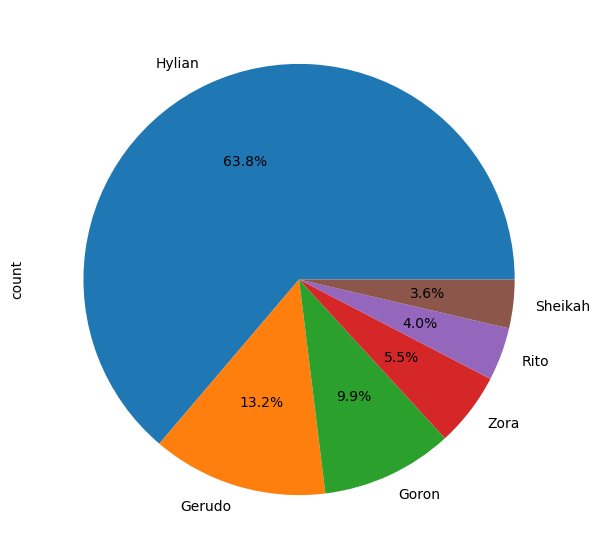

In [ ]:
pie = fforchi2
pie['race'].value_counts().plot.pie(figsize=(7, 7), autopct='%1.1f%%')

<Axes: ylabel='count'>

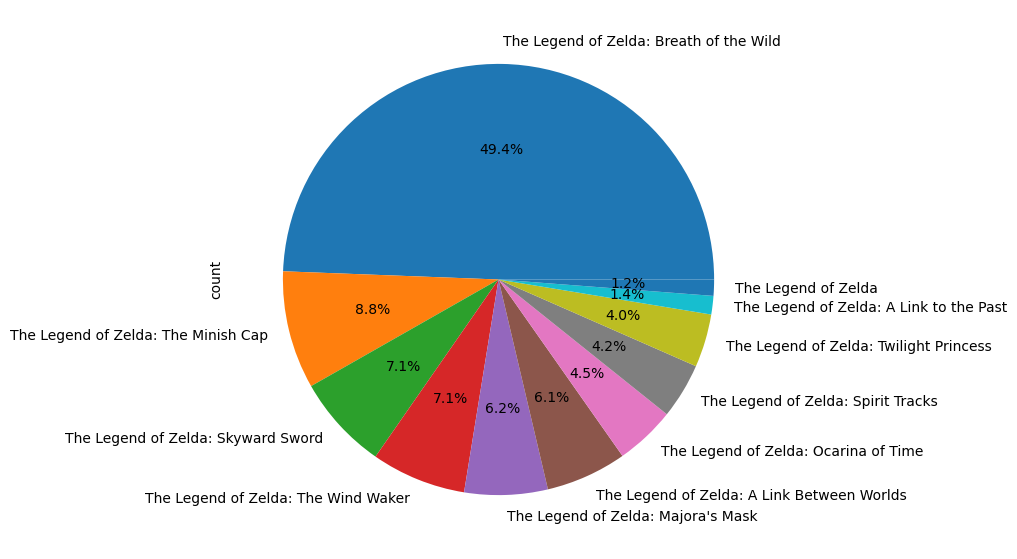

In [136]:
fforchi2.reset_index(inplace=True)
fforchi2['title'].value_counts().plot.pie(figsize=(7, 7), autopct='%1.1f%%')

In [129]:
import matplotlib.pyplot as plt
pie = fforchi2
pie.set_index('title', inplace=True)
plot = pie.plot.pie(y='race', figsize=(7, 7))

KeyError: "None of ['title'] are in the columns"